# Model Building

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
df=pd.read_csv('eda_data.csv')

In [21]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority'],
      dtype='object')

In [22]:
df_model= df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','hourly','employer_provided','job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority']]

### Dummy data(variables)

In [23]:
df_dum=pd.get_dummies(df_model)

### Split Train and Test data

In [24]:
X=df_dum.drop('avg_salary',axis=1)
y= df_dum.avg_salary.values

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Multiple linear Regression 

In [26]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [27]:
mlr.score(X_test,y_test)

0.5882330923257724

### Lasso Regression

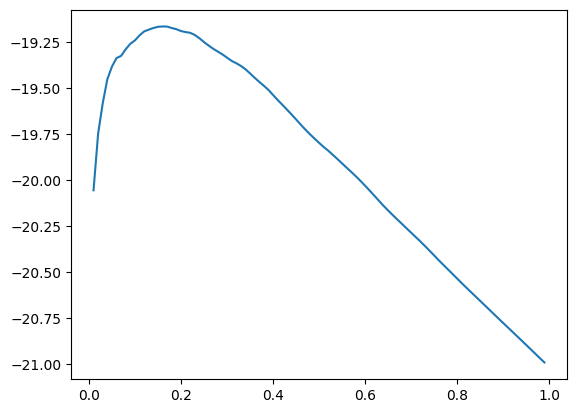

In [28]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    las_r = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(las_r,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [29]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
15,0.16,-19.165944


In [30]:
las_r = Lasso(alpha=.16)
las_r.fit(X_train,y_train)
np.mean(cross_val_score(las_r,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

np.float64(-19.165943594715003)

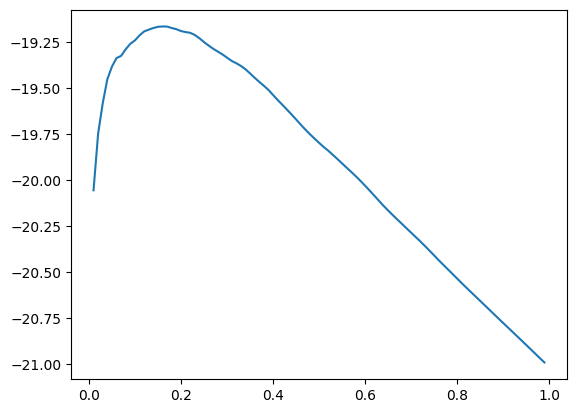

In [31]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)


In [32]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
15,0.16,-19.165944


In [33]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [34]:
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

np.float64(-14.971964673186895)